<a href="https://colab.research.google.com/github/shafique-md18/ML/blob/master/grape.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
# to mount gdrive & permanently install libraries
import os, sys
from google.colab import drive

In [ ]:
# for backward compatibility of newer versions in older pythonic code
# MUST be at the top
from __future__ import absolute_import, division, print_function, unicode_literals # unicode_literals 
                                                                                   # may be necessary

In [ ]:
# mount gdrive
drive.mount('/content/drive')

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3aietf%3awg%3aoauth%3a2.0%3aoob&response_type=code&scope=email%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdocs.test%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive.photos.readonly%20https%3a%2f%2fwww.googleapis.com%2fauth%2fpeopleapi.readonly

Enter your authorization code:
··········
Mounted at /content/drive


In [ ]:
%tensorflow_version 2.x
import tensorflow as tf
print(tf.__version__)

TensorFlow 2.x selected.
2.1.0-rc1


In [ ]:
from tensorflow import keras
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Conv2D, Flatten, Dropout, MaxPooling2D
from tensorflow.keras.preprocessing.image import ImageDataGenerator

import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import IPython.display as display
from PIL import Image

#Loading Data

In [ ]:
PATH = 'drive/My Drive/Grape'
print(os.listdir(PATH))

['training_dataset', 'testing_dataset', 'validation_dataset', 'model.h5', 'model_new.h5']


In [ ]:
train_dir = os.path.join(PATH, 'training_dataset')
validation_dir = os.path.join(PATH, 'testing_dataset')

In [ ]:
batch_size = 128
epochs = 10
IMG_HEIGHT = 192
IMG_WIDTH = 192

In [ ]:
train_image_generator = ImageDataGenerator(rescale=1./255)
validation_image_generator = ImageDataGenerator(rescale=1./255)

In [ ]:
train_data_gen = train_image_generator.flow_from_directory(batch_size=batch_size,
                                                           directory=train_dir,
                                                           shuffle=True,
                                                           target_size=(IMG_HEIGHT, IMG_WIDTH),
                                                           class_mode='categorical')

validation_data_gen = validation_image_generator.flow_from_directory(batch_size=batch_size,
                                                                     directory=validation_dir,
                                                                     shuffle=True,
                                                                     target_size=(IMG_HEIGHT, IMG_WIDTH),
                                                                     class_mode='categorical')

Found 2914 images belonging to 4 classes.
Found 290 images belonging to 4 classes.


In [ ]:
# extract a batch of image
sample_training_images, _ = next(train_data_gen) # train_data_gen is python generator hence the 
                                                # next function can be used on it to iterate
len(sample_training_images)

128

In [ ]:
train_data_gen.class_indices

{'Grape___Black_rot': 0,
 'Grape___Esca_(Black_Measles)': 1,
 'Grape___Leaf_blight_(Isariopsis_Leaf_Spot)': 2,
 'Grape___healthy': 3}

In [ ]:
# plot 5 training images
def plotImages(images_arr):
    plt.figure(figsize=(20,20))
    for x in range(len(images_arr)):
        plt.subplot(5,5,x+1)
        plt.xticks([])
        plt.yticks([])
        plt.imshow(images_arr[x])
    plt.tight_layout()
    plt.show()

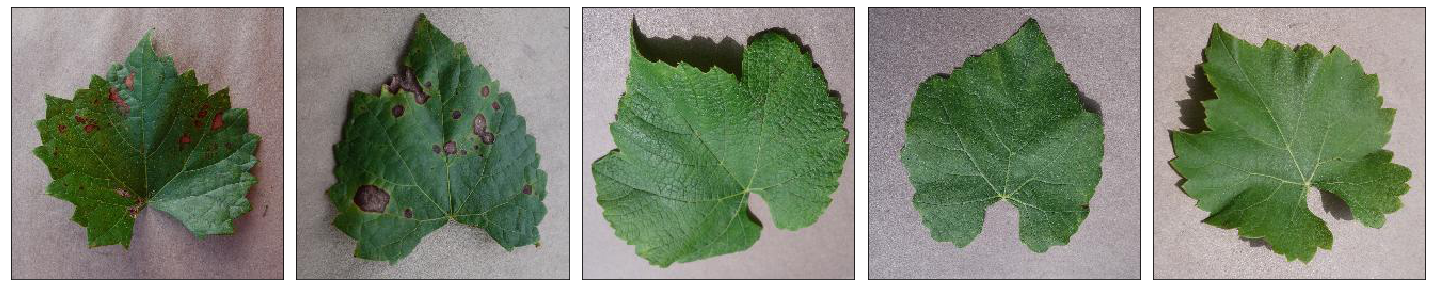

In [ ]:
plotImages(sample_training_images[:5])

In [ ]:
model = Sequential([
    Conv2D(16, 3, padding='same', activation='relu', input_shape=(IMG_HEIGHT, IMG_WIDTH, 3)),
    MaxPooling2D(),
    Conv2D(32, 3, padding='same', activation='relu'),
    MaxPooling2D(),
    Conv2D(64, 3, padding='same', activation='relu'),
    MaxPooling2D(),
    Flatten(),
    Dense(512, activation='relu'),
    Dense(4, activation='sigmoid')
])

In [ ]:
model.compile(optimizer='adam',
              loss='binary_crossentropy',
              metrics=['accuracy'])

In [ ]:
model.summary()

Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_6 (Conv2D)            (None, 192, 192, 16)      448       
_________________________________________________________________
max_pooling2d_6 (MaxPooling2 (None, 96, 96, 16)        0         
_________________________________________________________________
conv2d_7 (Conv2D)            (None, 96, 96, 32)        4640      
_________________________________________________________________
max_pooling2d_7 (MaxPooling2 (None, 48, 48, 32)        0         
_________________________________________________________________
conv2d_8 (Conv2D)            (None, 48, 48, 64)        18496     
_________________________________________________________________
max_pooling2d_8 (MaxPooling2 (None, 24, 24, 64)        0         
_________________________________________________________________
flatten_2 (Flatten)          (None, 36864)            

In [ ]:
history = model.fit(
    # x is input data
    # y is target data which needs not to be specified in this case
    # as input data is from generator and the classes are alredy defined in it.
    x=train_data_gen,
    epochs=epochs,
    validation_data=validation_data_gen,
)

  ...
    to  
  ['...']
  ...
    to  
  ['...']
Train for 23 steps, validate for 3 steps
Epoch 1/10
23/23 [==============================] - 584s 25s/step - loss: 0.6648 - accuracy: 0.7527 - val_loss: 0.4559 - val_accuracy: 0.7672
Epoch 2/10
23/23 [==============================] - 9s 382ms/step - loss: 0.2860 - accuracy: 0.8810 - val_loss: 0.3494 - val_accuracy: 0.8457
Epoch 3/10
23/23 [==============================] - 9s 377ms/step - loss: 0.1989 - accuracy: 0.9173 - val_loss: 0.2415 - val_accuracy: 0.8888
Epoch 4/10
23/23 [==============================] - 9s 380ms/step - loss: 0.1453 - accuracy: 0.9417 - val_loss: 0.1915 - val_accuracy: 0.9181
Epoch 5/10
23/23 [==============================] - 9s 381ms/step - loss: 0.1009 - accuracy: 0.9614 - val_loss: 0.1392 - val_accuracy: 0.9466
Epoch 6/10
23/23 [==============================] - 9s 392ms/step - loss: 0.0785 - accuracy: 0.9716 - val_loss: 0.1703 - val_accuracy: 0.9259
Epoch 7/10
23/23 [==============================] - 9s 39

In [ ]:
!pip install -q pyyaml h5py

In [ ]:
model.save(os.path.join(PATH, 'model.h5'))

In [ ]:
def visualize_history(history, epochs):
  acc = history.history['accuracy']
  val_acc = history.history['val_accuracy']

  loss = history.history['loss']
  val_loss = history.history['val_loss']

  epochs_range = range(epochs)

  plt.figure(figsize=(8,8))
  plt.subplot(2,2,1)
  plt.plot(epochs_range, acc, 'r', label='Training Accuracy')
  plt.plot(epochs_range, val_acc, 'b', label='Validation Accuracy')
  plt.legend(loc='best')
  plt.title('Training and validation accuracy')
  plt.subplot(2,2,2)
  plt.plot(epochs_range, loss, 'r', label='Training Loss')
  plt.plot(epochs_range, val_loss, 'b', label='Validation Loss')
  plt.legend(loc='best')
  plt.title('Training and validation loss')
  plt.show()

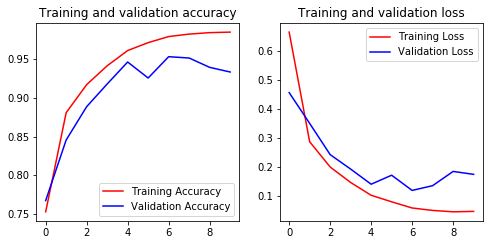

In [ ]:
visualize_history(history, epochs)

# Using Data augmentation

In [ ]:
image_gen_train = ImageDataGenerator(rescale=1./255,
                                     rotation_range=45,
                                     width_shift_range=.15,
                                     height_shift_range=.15,
                                     horizontal_flip=True,
                                     zoom_range=.5)

In [ ]:
IMG_HEIGHT = IMG_WIDTH = 256
epochs = 16
train_data_gen = image_gen_train.flow_from_directory(train_dir,
                                                     target_size=(IMG_HEIGHT, IMG_WIDTH),
                                                     shuffle=True,
                                                     class_mode='categorical',
                                                     batch_size=batch_size)

Found 2914 images belonging to 4 classes.


In [ ]:
val_data_gen = image_gen_train.flow_from_directory(validation_dir,
                                                   target_size=(IMG_HEIGHT, IMG_WIDTH),
                                                   batch_size=batch_size,
                                                   class_mode='categorical')

Found 290 images belonging to 4 classes.


In [ ]:
model_new = Sequential([
    Conv2D(16, 3, padding='same', activation='relu', 
           input_shape=(IMG_HEIGHT, IMG_WIDTH ,3)),
    MaxPooling2D(),
    Dropout(0.2),
    Conv2D(32, 3, padding='same', activation='relu'),
    MaxPooling2D(),
    Conv2D(64, 3, padding='same', activation='relu'),
    MaxPooling2D(),
    Dropout(0.2),
    Flatten(),
    Dense(512, activation='relu'),
    Dense(4, activation='sigmoid')
])

In [ ]:
model_new.compile(optimizer='adam',
              loss='binary_crossentropy',
              metrics=['accuracy'])

model_new.summary()

Model: "sequential_6"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_18 (Conv2D)           (None, 256, 256, 16)      448       
_________________________________________________________________
max_pooling2d_18 (MaxPooling (None, 128, 128, 16)      0         
_________________________________________________________________
dropout_6 (Dropout)          (None, 128, 128, 16)      0         
_________________________________________________________________
conv2d_19 (Conv2D)           (None, 128, 128, 32)      4640      
_________________________________________________________________
max_pooling2d_19 (MaxPooling (None, 64, 64, 32)        0         
_________________________________________________________________
conv2d_20 (Conv2D)           (None, 64, 64, 64)        18496     
_________________________________________________________________
max_pooling2d_20 (MaxPooling (None, 32, 32, 64)       

In [ ]:
history_new = model_new.fit(
    # x is input data
    # y is target data which needs not to be specified in this case
    # as input data is from generator and the classes are alredy defined in it.
    x=train_data_gen,
    epochs=epochs,
    validation_data=val_data_gen,
)

  ...
    to  
  ['...']
  ...
    to  
  ['...']
Train for 23 steps, validate for 3 steps
Epoch 1/16
23/23 [==============================] - 48s 2s/step - loss: 0.5273 - accuracy: 0.7495 - val_loss: 0.5237 - val_accuracy: 0.7793
Epoch 2/16
23/23 [==============================] - 48s 2s/step - loss: 0.3876 - accuracy: 0.8282 - val_loss: 0.3674 - val_accuracy: 0.8310
Epoch 3/16
23/23 [==============================] - 48s 2s/step - loss: 0.2686 - accuracy: 0.8845 - val_loss: 0.2944 - val_accuracy: 0.8543
Epoch 4/16
23/23 [==============================] - 48s 2s/step - loss: 0.2454 - accuracy: 0.8928 - val_loss: 0.3014 - val_accuracy: 0.8698
Epoch 5/16
23/23 [==============================] - 48s 2s/step - loss: 0.2011 - accuracy: 0.9143 - val_loss: 0.2497 - val_accuracy: 0.9000
Epoch 6/16
23/23 [==============================] - 49s 2s/step - loss: 0.1817 - accuracy: 0.9222 - val_loss: 0.2311 - val_accuracy: 0.9052
Epoch 7/16
23/23 [==============================] - 49s 2s/step - los

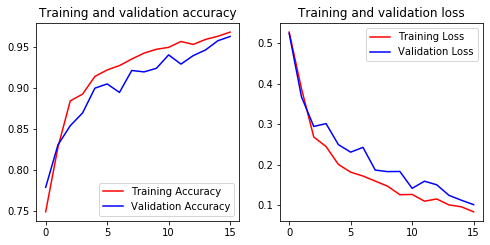

In [ ]:
visualize_history(history_new, epochs)

In [ ]:
model_new.save(os.path.join(PATH, 'model_new.h5'))